In [178]:

import yaml

with open('config.yaml', 'r') as f:
    cfg = yaml.safe_load(f)


In [4]:
import pandas as pd
import random
from random import randrange
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [201]:
train_df = pd.read_csv(cfg['selary']['test_dataset'], low_memory=False)
train_df.drop(columns=['ID'], inplace=True)
train_df.drop(columns=['Name'], inplace=True)
train_df.drop(columns=['SSN'], inplace=True)
train_df.drop(columns=['Customer_ID'], inplace=True)

In [7]:
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer


In [155]:
train_df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.86622816574095,Poor
99996,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.651610435322,Poor
99997,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.8090832742814,Poor
99998,July,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.1649785257098,Standard


In [202]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
label_encoder = LabelEncoder()

train_df['Month'] = pd.Series(label_encoder.fit_transform(train_df['Month']))
train_df['Occupation'] = pd.Series(label_encoder.fit_transform(train_df['Occupation']))
train_df['Type_of_Loan'] = pd.Series(label_encoder.fit_transform(train_df['Type_of_Loan']))
#train_df['Credit_Score'] = train_df['Credit_Score'].replace({'Poor': 0, 'Standard': 1, 'Good':2})
#train_df['Payment_of_Min_Amount'] = train_df['Payment_of_Min_Amount'].replace({'No': 0, 'NM': 1, 'Yes':2})
#train_df['Credit_Mix'] = train_df['Credit_Mix'].replace({'Bad': 0, 'Standard': 1, '-':2, 'Good':3})

In [166]:
train_df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3,23,12,19114.12,1824.843333,3,4,3,4,128,...,_,809.98,26.822620,22 Years and 1 Months,0,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,2
1,2,23,12,19114.12,NaN,3,4,3,4,128,...,3,809.98,31.944960,NaN,0,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,2
2,6,-500,12,19114.12,NaN,3,4,3,4,128,...,3,809.98,28.609352,22 Years and 3 Months,0,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,2
3,0,23,12,19114.12,NaN,3,4,3,4,128,...,3,809.98,31.377862,22 Years and 4 Months,0,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,2
4,7,23,12,19114.12,1824.843333,3,4,3,4,128,...,3,809.98,24.797347,22 Years and 5 Months,0,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,25,9,39628.99,3359.415833,4,6,7,2,683,...,_,502.38,34.663572,31 Years and 6 Months,0,35.104023,60.97133255718485,High_spent_Large_value_payments,479.86622816574095,0
99996,7,25,9,39628.99,3359.415833,4,6,7,2,683,...,_,502.38,40.565631,31 Years and 7 Months,0,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.651610435322,0
99997,5,25,9,39628.99,3359.415833,4,6,5729,2,683,...,3,502.38,41.255522,31 Years and 8 Months,0,35.104023,24.02847744864441,High_spent_Large_value_payments,516.8090832742814,0
99998,4,25,9,39628.99,3359.415833,4,6,7,2,683,...,3,502.38,33.638208,31 Years and 9 Months,0,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.1649785257098,1


In [203]:
class HotEncode:
    def __init__(self, train_df):
        self.train_df = train_df

    def encoderr(self, odf):
        encoder = OneHotEncoder(sparse_output=False)
        df = odf.to_frame()
        encodedData = encoder.fit_transform(df)
        encoded_df = pd.DataFrame(encodedData, columns=encoder.get_feature_names_out(df.columns))
        self.train_df.drop(columns=[odf.name], inplace=True)
        self.train_df = pd.concat([self.train_df,encoded_df], axis=1)
        return self.train_df



encoder = HotEncode(train_df)
train_df = encoder.encoderr(train_df['Payment_Behaviour'])
train_df = encoder.encoderr(train_df['Payment_of_Min_Amount'])
train_df = encoder.encoderr(train_df['Credit_Mix'])
#train_df = encoder.encoderr(train_df['Credit_Score'])

In [204]:
def parse_data(value):
    if type(value) == float:
        return value
    else: return int(value.split(' ')[0]) *12 + int(value.split(' ')[3])


train_df['Credit_History_Age'] = train_df['Credit_History_Age'].apply(parse_data)

In [205]:
def convert_to_float_or_random(value):
    if type(value) == float:
        return value
    elif type(value) is int:
        return value
    elif value == '__10000__':
        return 1111111
    elif value == "__-333333333333333333333333333__":
        return 3333333
    elif value == '_':
        return 0
    elif value[-1] == '_':
        try: return float(value[0:-1])
        except ValueError:
            print(value)
    else:
        try:
            return float(value)
        except ValueError:
            print(value)


train_df[train_df.select_dtypes(include='object').columns] =train_df.select_dtypes(include=['object']).map(convert_to_float_or_random)



In [206]:
for col, upper_bound in (
    ('Age', 80),
    ('Num_Bank_Accounts', 20),
    ('Num_Credit_Card', 20),
    ('Interest_Rate', 40),
    ('Num_of_Loan', 20),
    ('Num_of_Delayed_Payment', 40),
    ('Num_Credit_Inquiries', 25),
    ('Amount_invested_monthly',400 ),
    ('Total_EMI_per_month', 250),
    ('Annual_Income', 100000),
    ('Monthly_Balance', 600 )

):
    train_df = train_df.drop(train_df[train_df[col] > upper_bound].index)

for col, down_bound in (
    ('Age', 1),
    ('Num_Bank_Accounts', 0),
    ('Num_Credit_Card', 0),
    ('Interest_Rate', 0),
    ('Num_of_Loan', 0),
    ('Num_of_Delayed_Payment', 0),
    ('Num_Credit_Inquiries', 0),
    ('Amount_invested_monthly',0 )

):
    train_df = train_df.drop(train_df[train_df[col] < down_bound].index)


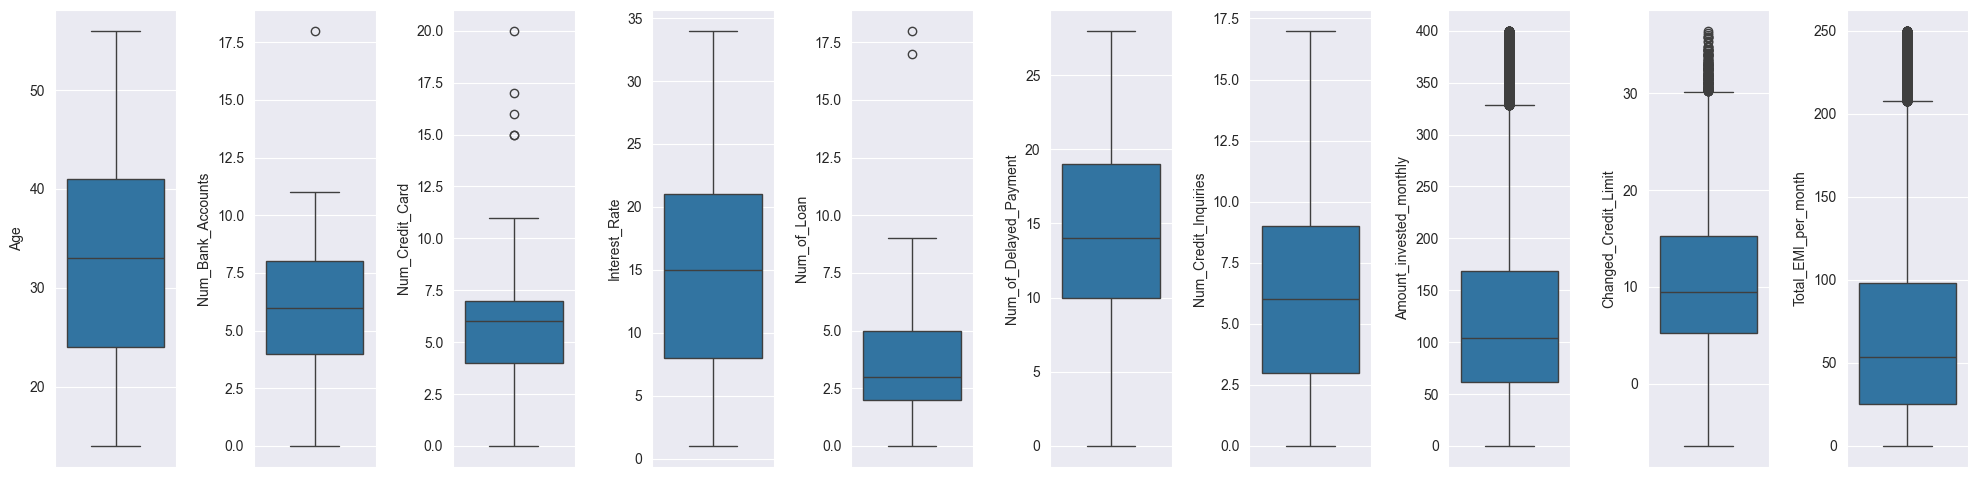

In [69]:
out_col = ['Age', 'Num_Bank_Accounts','Num_Credit_Card', 'Interest_Rate','Num_of_Loan','Num_of_Delayed_Payment','Num_Credit_Inquiries','Amount_invested_monthly', 'Changed_Credit_Limit', 'Total_EMI_per_month' ]

fig, axes = plt.subplots(1,10, figsize=(20, 5))
for ax, col in zip(axes, out_col):
    sns.boxplot(y=train_df[col], data=train_df, ax=ax)
fig.tight_layout(pad=1.5)

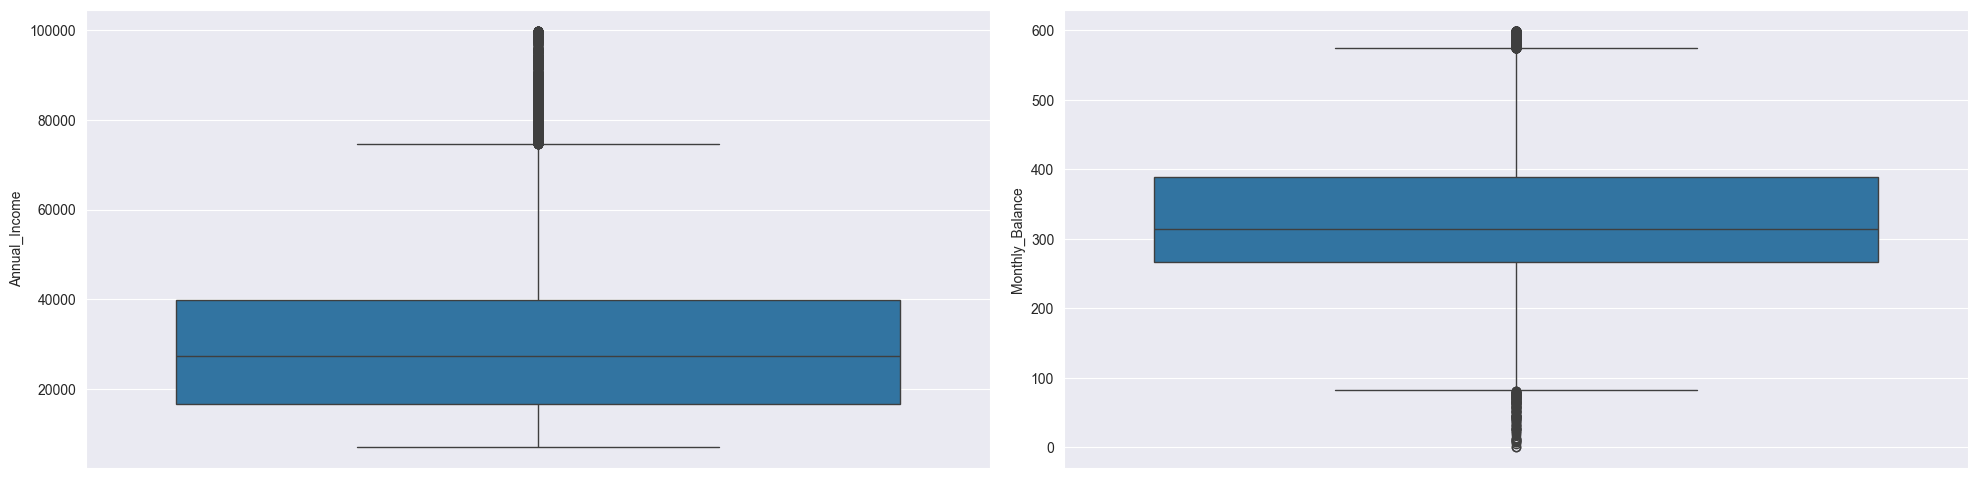

In [173]:
out_col = ['Annual_Income', 'Monthly_Balance' ]

fig, axes = plt.subplots(1,2, figsize=(20, 5))
for ax, col in zip(axes, out_col):
    sns.boxplot(y=train_df[col], data=train_df, ax=ax)
fig.tight_layout(pad=1.5)

In [209]:
train_df.isna().sum()

Month                                                 0
Age                                                   0
Occupation                                            0
Annual_Income                                         0
Monthly_Inhand_Salary                                 0
Num_Bank_Accounts                                     0
Num_Credit_Card                                       0
Interest_Rate                                         0
Num_of_Loan                                           0
Type_of_Loan                                          0
Delay_from_due_date                                   0
Num_of_Delayed_Payment                                0
Changed_Credit_Limit                                  0
Num_Credit_Inquiries                                  0
Outstanding_Debt                                      0
Credit_Utilization_Ratio                              0
Credit_History_Age                                    0
Total_EMI_per_month                             

In [208]:
num_сols_with_missing = [col for col in train_df.columns
                         if train_df[col].isnull().any()]
train_df[num_сols_with_missing] = train_df[num_сols_with_missing].fillna(train_df[num_сols_with_missing].mean())

0        312.494089
1        284.629162
3        223.451310
4        341.489231
5        340.479212
            ...    
99994    410.256158
99995    479.866228
99996    496.651610
99998    319.164979
99999    393.673696
Name: Monthly_Balance, Length: 54836, dtype: float64

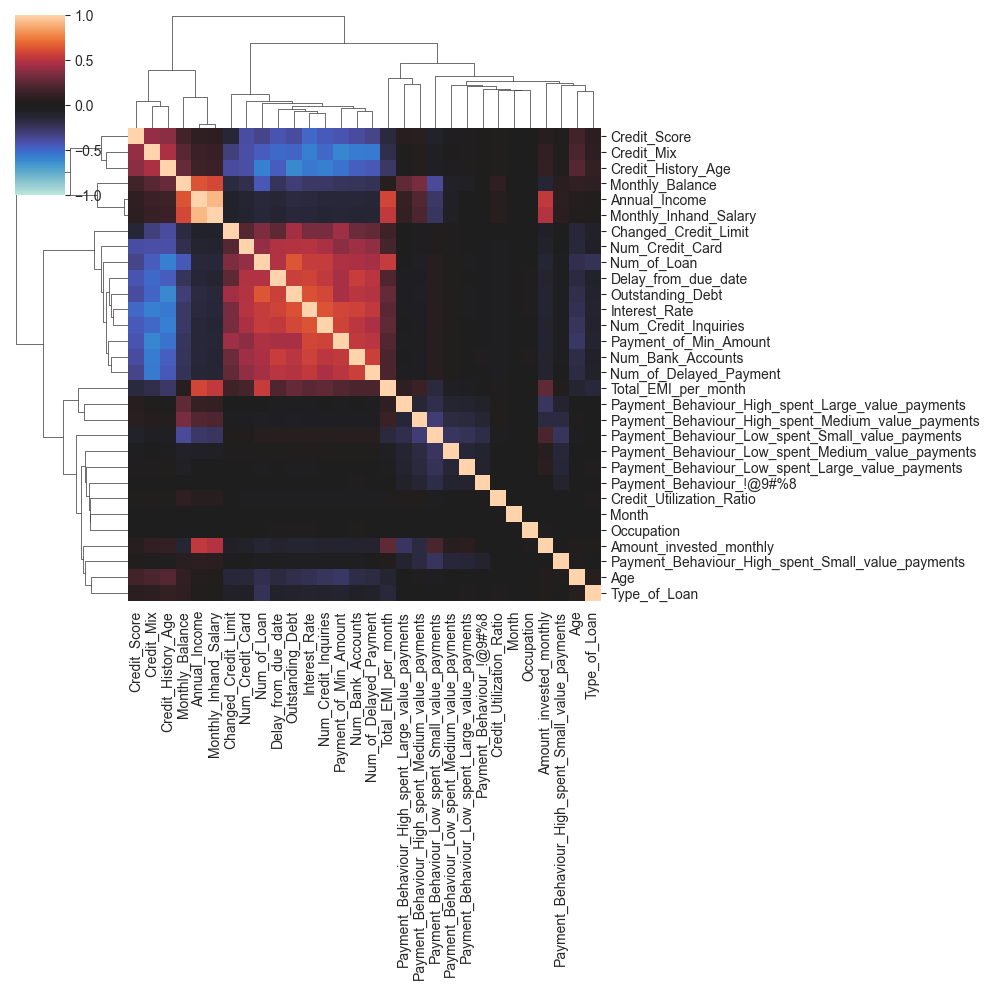

In [175]:
def corrplot(df, method="pearson", annot=True, **kwargs):
    sns.clustermap(
        df.corr(method),
        vmin=-1.0,
        vmax=1.0,
        cmap="icefire",
        method="complete",
        annot=annot,
        **kwargs,
    )

corrplot(train_df, annot=None)


In [210]:
train_df.to_csv('test_2.csv', header=True)